In [3]:
import sklearn
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
boston = load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)

bos = pd.DataFrame(boston.data)
print(bos.head())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

/Users/kacperleczynski/opt/anaconda3/envs/air/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

(13, 13)
[(0, (6.138981200359456+0j), array([-0.2509514 ,  0.31525237, -0.24656649, -0.06177071,  0.08215692,
        0.21965961, -0.77760721, -0.15335048, -0.0459523 , -0.26039028,
        0.08676107,  0.10964435, -0.01936913])), (1, (1.4361132907452245+0j), array([ 0.25631454,  0.3233129 , -0.29585782, -0.12871159,  0.32061699,
        0.3233881 ,  0.27499628,  0.40268031,  0.08091897, -0.35813749,
       -0.07142528, -0.26275629, -0.26752723])), (2, (1.245077300116311+0j), array([-0.34667207, -0.11249291,  0.01594592, -0.01714571, -0.00781119,
        0.0761379 ,  0.33957645, -0.17393172,  0.25107654, -0.64441615,
       -0.11319963,  0.30316943,  0.36353226]))]


<BarContainer object of 13 artists>

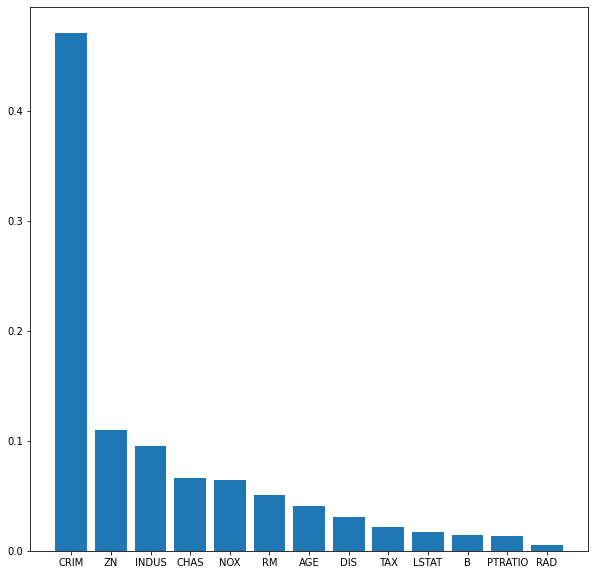

In [5]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.linalg import eig

X = bos
Y = pd.DataFrame(boston.target)

scaler = StandardScaler()
X = scaler.fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

cov = np.cov(X.T)
print(cov.shape)

(eigen_values, eigen_vectors) = eig(cov)
idx = [i for i in range(cov.shape[0])]
sorted_eig = sorted(zip(idx, eigen_values, eigen_vectors), key=lambda x: x[1], reverse=True)
k = 3

print(sorted_eig[:k])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
eig_values_sum = np.sum([np.real(e[1]) for e in sorted_eig])
eig_values_scaled = [np.real(e[1]) / eig_values_sum for e in sorted_eig]
ax.bar([boston['feature_names'][e[0]] for e in sorted_eig], eig_values_scaled)

In [7]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
df = pd.read_csv('USArrests.csv', index_col=0)
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)


pca_loadings = pd.DataFrame(PCA(n_components=2).fit(X).components_.T, index=df.columns, columns=['V1', 'V2'])
print(pca_loadings)
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
print(df_plot.head())

                V1        V2
Murder    0.535899  0.418181
Assault   0.583184  0.187986
UrbanPop  0.278191 -0.872806
Rape      0.543432 -0.167319
                 PC1       PC2       PC3       PC4
Alabama     0.985566  1.133392 -0.444269  0.156267
Alaska      1.950138  1.073213  2.040003 -0.438583
Arizona     1.763164 -0.745957  0.054781 -0.834653
Arkansas   -0.141420  1.119797  0.114574 -0.182811
California  2.523980 -1.542934  0.598557 -0.341996


In [ ]:
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
    # Plot reference lines
    ax1.hlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
    ax1.vlines(0, -3.5, 3.5, linestyles='dotted', colors='grey')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    # Plot Principal Component loading vectors, using a second y-axis.
    ax2 = ax1.twinx().twiny()
    ax2.set_ylim(-1, 1)
    ax2.set_xlim(-1, 1)
    ax2.set_xlabel('Principal Component loading vectors', color='red')

[2.53085875 1.00996444 0.36383998 0.17696948]
[0.62006039 0.24744129 0.0891408  0.04335752]


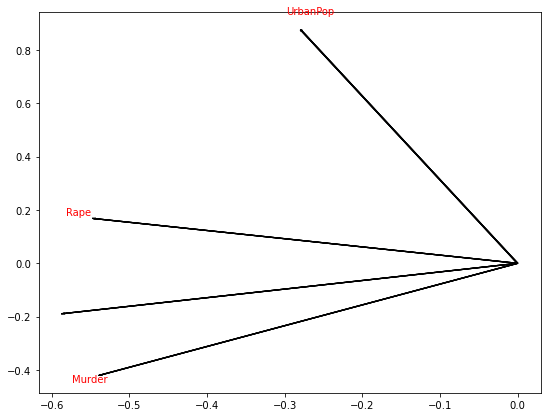

In [3]:
# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and t
a = 1.07
fig2, ax2 = plt.subplots(figsize=(9, 7))
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i] * a, -pca_loadings.V2.loc[i] * a), color='red')
    # Plot vectors
    ax2.arrow(0, 0, -pca_loadings.V1[0], -pca_loadings.V2[0])
    ax2.arrow(0, 0, -pca_loadings.V1[1], -pca_loadings.V2[1])
    ax2.arrow(0, 0, -pca_loadings.V1[2], -pca_loadings.V2[2])
    ax2.arrow(0, 0, -pca_loadings.V1[3], -pca_loadings.V2[3])
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

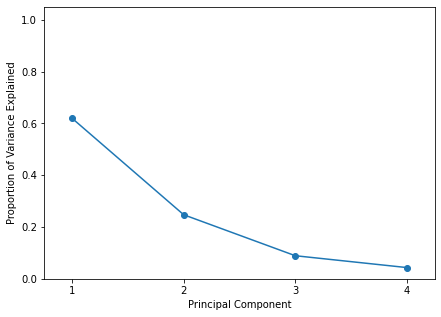

In [4]:

fig3, ax3 = plt.subplots(figsize=(7, 5))
ax3.plot([1, 2, 3, 4], pca.explained_variance_ratio_, '-o')
ax3.set_ylabel('Proportion of Variance Explained')
ax3.set_xlabel('Principal Component')
ax3.set_xlim(0.75, 4.25)
ax3.set_ylim(0, 1.05)
ax3.set_xticks([1, 2, 3, 4])

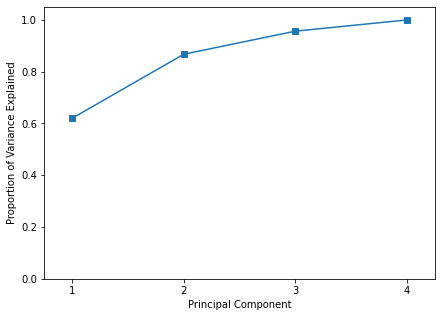

In [5]:
fig4, ax4 = plt.subplots(figsize=(7, 5))
ax4.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
ax4.set_ylabel('Proportion of Variance Explained')
ax4.set_xlabel('Principal Component')
ax4.set_xlim(0.75,4.25)
ax4.set_ylim(0,1.05)
ax4.set_xticks([1,2,3,4])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB
(64, 6830)


Text(0, 0.5, 'Variances')

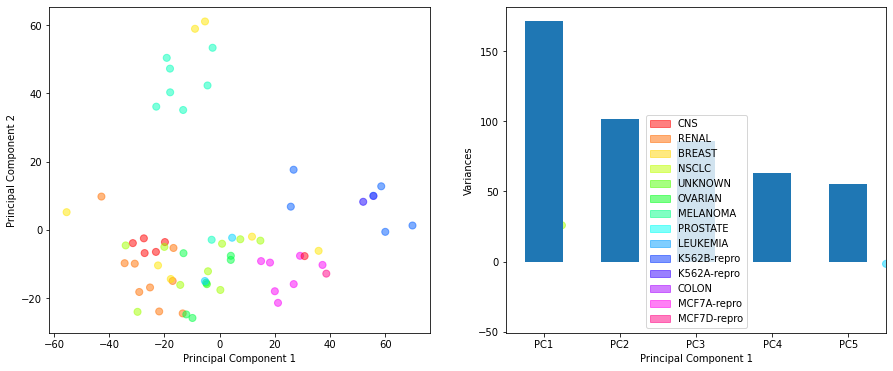

In [6]:
df2 = pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()
# Read in the labels to check our work later
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
# Scale the data
X = pd.DataFrame(scale(df2))
print(X.shape)
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))
import matplotlib as mpl
fig5, (ax5, ax6) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax5.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax5.set_ylabel('Principal Component 2')
# Right plot
ax6.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax6.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
    ax6.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig5.axes:
    ax.set_xlabel('Principal Component 1')
df2_plot = pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
pca2.explained_variance_ratio_[:5],
np.cumsum(pca2.explained_variance_ratio_[:5])],
index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
ax6.set_ylabel('Variances')


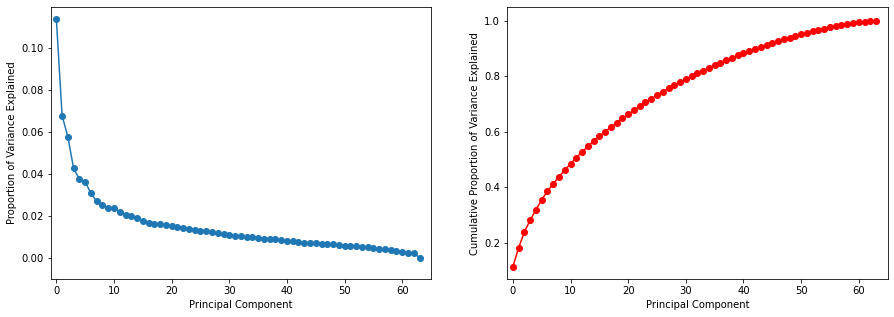

In [7]:
fig6 , (ax7,ax8) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax7.plot(pca2.explained_variance_ratio_, '-o')
ax7.set_ylabel('Proportion of Variance Explained')
ax7.set_ylim(ymin=-0.01)
# Right plot
ax8.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax8.set_ylabel('Cumulative Proportion of Variance Explained')
ax8.set_ylim(ymax=1.05)
for ax in fig6.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)
